# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 2: Youtube trending page analysis

## Group members 
- Group member 
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu
- Group member 
    - Name: Thuy Hong Doan
    - Email: td688@drexel.edu
- Group member 
    - Name: Alsulami Meznah
    - Email: mha54@drexel.edu

## Cleaning Youtube trending dataset 

Before starting the anaylsis, it is important to clean the dataset that the project relies on. The project cleaning consisted of: 
- Finding and deleting rows with a missing values, which were mainly in the Description column. 
- Replacing NaN in description with space.
- Deleting rows with comments_disabled=True or ratings_disabled=True.
- Fixing the Tags column,by Replacing "[None]" with space, and spliting tags with '|' and convert list to one string.
- Dropping duplicates rows in video id column.
- Converting date columns 'publishedAt', 'trending_date' to datetime type.
- Reseting indexing of the dataframe


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

US_category_id = pd.read_json('data/US_category_id.json')
trending_youtube = pd.read_csv('data/US_youtube_trending_data.csv')


In [122]:
# getting information about the dataset
trending_youtube.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180390 entries, 0 to 180389
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           180390 non-null  object
 1   title              180390 non-null  object
 2   publishedAt        180390 non-null  object
 3   channelId          180390 non-null  object
 4   channelTitle       180390 non-null  object
 5   categoryId         180390 non-null  int64 
 6   trending_date      180390 non-null  object
 7   tags               180390 non-null  object
 8   view_count         180390 non-null  int64 
 9   likes              180390 non-null  int64 
 10  dislikes           180390 non-null  int64 
 11  comment_count      180390 non-null  int64 
 12  thumbnail_link     180390 non-null  object
 13  comments_disabled  180390 non-null  bool  
 14  ratings_disabled   180390 non-null  bool  
 15  description        176384 non-null  object
dtypes: bool(2), int64(5)

In [123]:
# cleaning dataset 
# number of null values in the dataset
trending_youtube.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4006
dtype: int64

The description column has all null values. These are some of the rows whose description values are null.

In [124]:
trending_youtube[trending_youtube["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
223,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62939,168,7304,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN
249,NYXABBpPJss,When you get on the grill for your friends Bir...,2020-08-12T04:36:57Z,UCI8hY4ummWDZgFSjxU_HFNQ,Jeremiah Phillips,23,2020-08-13T00:00:00Z,[None],193157,9057,148,666,https://i.ytimg.com/vi/NYXABBpPJss/default.jpg,False,False,NaN
446,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-14T00:00:00Z,Lock|picking,511773,69610,214,7837,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN


In [125]:
# Replace NaN in description with space
trending_youtube["description"].fillna(" ", inplace=True)
# Delete all rows with a missing values if any
trending_youtube.dropna(inplace=True)

In [126]:
# checking for the NAN values
trending_youtube.isnull().sum().sum()

0

In [127]:
trending_youtube.shape

(180390, 16)

Since our main focus is to find factors that effect the trending of a video, any videos with disbaled comments of ratings will be exculded from our project.

In [128]:
# delete rows with comments_disabled=True or ratings_disabled=True
trending_youtube = trending_youtube[(trending_youtube['comments_disabled'] == False) &
                    (trending_youtube['ratings_disabled'] == False)]
trending_youtube.shape

(177001, 16)

In [129]:
trending_youtube["tags"].head(10)

0    brawadis|prank|basketball|skits|ghost|funny vi...
1    Apex Legends|Apex Legends characters|new Apex ...
2    jacksepticeye|funny|funny meme|memes|jacksepti...
3    xxl freshman|xxl freshmen|2020 xxl freshman|20...
4    The LaBrant Family|DIY|Interior Design|Makeove...
5    Professor injury|professor achilles|professor ...
6                                               [None]
7                     cgpgrey|education|hello internet
8    surprising|dad|father|papa|with|dream|car|truc...
9    Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...
Name: tags, dtype: object

Tags columns is not comphrensive, that's why we need to convert "none" values into empty string and remove "|" to form one string for each row.

In [130]:
# Replace [None] in tags with space 
trending_youtube.loc[trending_youtube['tags'] == '[None]', 'tags'] = ' '
# split tags with '|' and convert list to one string
trending_youtube['tags'] = [' '.join(tag) \
                       for tag in trending_youtube['tags'].str.split('|')]

trending_youtube["tags"].head(10)

0    brawadis prank basketball skits ghost funny vi...
1    Apex Legends Apex Legends characters new Apex ...
2    jacksepticeye funny funny meme memes jacksepti...
3    xxl freshman xxl freshmen 2020 xxl freshman 20...
4    The LaBrant Family DIY Interior Design Makeove...
5    Professor injury professor achilles professor ...
6                                                     
7                     cgpgrey education hello internet
8    surprising dad father papa with dream car truc...
9    Vengo De Nada Aleman Ovi Big Soto Trap Ovi Nat...
Name: tags, dtype: object

There is a lot of duplicates rows in the dataset, where we can verify using video id column and unique() to get the real size of nonduplicates rows. That's any row with duplicate title and video id will be dropped from the dataset.

In [131]:
len(trending_youtube['video_id'].unique())

32449

In [132]:
len(trending_youtube['video_id'])

177001

In [133]:
# .drop_duplicates()
# these are the duplicate values with same video id
duplicates = trending_youtube[trending_youtube['video_id'].duplicated() == True]
duplicates

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
202,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13T00:00:00Z,brawadis prank basketball skits ghost funny vi...,3017834,183592,9506,41374,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
207,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-13T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2802823,401421,3728,44546,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
209,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-13T00:00:00Z,Apex Legends Apex Legends characters new Apex ...,2932421,153682,3281,17454,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
213,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-13T00:00:00Z,The LaBrant Family DIY Interior Design Makeove...,1922758,54959,1758,2662,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
214,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-13T00:00:00Z,xxl freshman xxl freshmen 2020 xxl freshman 20...,944498,29016,2809,9278,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180385,xxSyov0Hjz8,Tom Hanks Eats His Last Meal,2023-01-19T11:00:29Z,UCXGR70CkW_pXb8n52LzCCRw,Mythical Kitchen,24,2023-01-26T00:00:00Z,mythical kitchen mythical chef josh scherer ni...,1218886,67099,0,4899,https://i.ytimg.com/vi/xxSyov0Hjz8/default.jpg,False,False,"Today, Josh is cooking Tom Hanks's last meal.D..."
180386,rkXx6yqsgOY,Japan $1000 Crane Game Challenge Ft. @Daidus,2023-01-19T18:15:03Z,UCPsZ_0SkFdi551iYTG04R2g,CDawgVA,24,2023-01-26T00:00:00Z,Crane Game Japan UFO Catcher CDawg Daidus Conn...,925816,60351,0,2292,https://i.ytimg.com/vi/rkXx6yqsgOY/default.jpg,False,False,Use my code CDAWG15 at https://partner.bokksu....
180387,7nKMUkcSC2s,Wednesday Pitch Meeting,2023-01-19T20:15:00Z,UC9Kq-yEt1iYsbUzNOoIRK0g,Pitch Meeting,24,2023-01-26T00:00:00Z,Wednesday addams family christina ricci funny ...,1183539,82003,0,6272,https://i.ytimg.com/vi/7nKMUkcSC2s/default.jpg,False,False,Step inside the Pitch Meeting that led to Wedn...
180388,ZWj-Z4Z2W3k,The Kid LAROI - I Can’t Go Back To The Way It ...,2023-01-19T15:00:20Z,UC6G2vAJrt407lwiynW116Eg,The Kid LAROI.,10,2023-01-26T00:00:00Z,the kid laroi thekidlaroi laroi tkl the first ...,1195825,55682,0,2831,https://i.ytimg.com/vi/ZWj-Z4Z2W3k/default.jpg,False,False,The Kid LAROI I Can’t Go Back To The Way It Wa...


There is almost 7 duplicates for a single video! since while collecting dataset, the video can remain in the trending page for a while so when collecting the dataset it will get the video multiple times but with different viewer count and comments and other variables. so when we drop our duplicates we make sure to leave the last time the video was trending. 

In [134]:
trending_youtube[trending_youtube['video_id'] == "J78aPJ3VyNs"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
207,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-13T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2802823,401421,3728,44546,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
442,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-14T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3136088,427609,4009,46133,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
657,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-15T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3309124,442555,4156,46699,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
909,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-16T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3384892,448809,4209,47003,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1159,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-17T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3439181,453464,4246,47188,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1399,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-18T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3490530,457130,4269,47291,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [135]:
len(duplicates['video_id'])

144552

In [136]:
# trending_youtube.drop_duplicates(subset=['title','video_id'], keep='last' , inplace= True)
trending_youtube.drop_duplicates(subset=['title','video_id'], keep='first' , inplace= True)

In [137]:
# last updated video before leaving the trending page
trending_youtube[trending_youtube['video_id'] == "J78aPJ3VyNs"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [138]:
len(trending_youtube)

33461

Converting date columns from object to datetime type, to easily manipulate them in the analysis.

In [139]:
trending_youtube.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [140]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11T19:20:14Z,2020-08-12T00:00:00Z
1,2020-08-11T17:00:10Z,2020-08-12T00:00:00Z
2,2020-08-11T16:34:06Z,2020-08-12T00:00:00Z
3,2020-08-11T16:38:55Z,2020-08-12T00:00:00Z
4,2020-08-11T15:10:05Z,2020-08-12T00:00:00Z


In [141]:
#Trending date column has object data type which needs to changed as datetime
trending_youtube['trending_date'] = pd.to_datetime(trending_youtube['trending_date'], format = "%Y-%m-%dT%H:%M:%SZ")
#The publishedAt column converted with the astype function
trending_youtube['publishedAt'] = trending_youtube['publishedAt'].astype('datetime64[ns]')
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11 19:20:14,2020-08-12
1,2020-08-11 17:00:10,2020-08-12
2,2020-08-11 16:34:06,2020-08-12
3,2020-08-11 16:38:55,2020-08-12
4,2020-08-11 15:10:05,2020-08-12


In [142]:
trending_youtube[['trending_date','publishedAt']].dtypes

trending_date    datetime64[ns]
publishedAt      datetime64[ns]
dtype: object

Since we dropped rows and change few parts in the dataset, the indexing of the dataframe won't be coherent, we can simply reset it.

In [143]:
trending_youtube.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            180227, 180228, 180229, 180230, 180237, 180238, 180242, 180257,
            180288, 180375],
           dtype='int64', length=33461)

In [144]:
trending_youtube.reset_index(drop=True, inplace=True)

In [145]:
trending_youtube.index

RangeIndex(start=0, stop=33461, step=1)

In [146]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33461 entries, 0 to 33460
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33461 non-null  object        
 1   title              33461 non-null  object        
 2   publishedAt        33461 non-null  datetime64[ns]
 3   channelId          33461 non-null  object        
 4   channelTitle       33461 non-null  object        
 5   categoryId         33461 non-null  int64         
 6   trending_date      33461 non-null  datetime64[ns]
 7   tags               33461 non-null  object        
 8   view_count         33461 non-null  int64         
 9   likes              33461 non-null  int64         
 10  dislikes           33461 non-null  int64         
 11  comment_count      33461 non-null  int64         
 12  thumbnail_link     33461 non-null  object        
 13  comments_disabled  33461 non-null  bool          
 14  rating

In [147]:
#creating dictionary for json file provided for category and category id
category_dict = {}
for i in US_category_id['items']:
    category_dict[i['id']] = i['snippet']['title']

In [148]:
#replacing the category id with category actual name 
def replace_categoryid(df):
    if str(df) in category_dict:
        return category_dict[str(df)]
    
trending_youtube['category'] = trending_youtube['categoryId'].apply(replace_categoryid)

In [149]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33461 entries, 0 to 33460
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33461 non-null  object        
 1   title              33461 non-null  object        
 2   publishedAt        33461 non-null  datetime64[ns]
 3   channelId          33461 non-null  object        
 4   channelTitle       33461 non-null  object        
 5   categoryId         33461 non-null  int64         
 6   trending_date      33461 non-null  datetime64[ns]
 7   tags               33461 non-null  object        
 8   view_count         33461 non-null  int64         
 9   likes              33461 non-null  int64         
 10  dislikes           33461 non-null  int64         
 11  comment_count      33461 non-null  int64         
 12  thumbnail_link     33461 non-null  object        
 13  comments_disabled  33461 non-null  bool          
 14  rating

## EDA

#### 1. What categories that youtube users in the US are interested in?

In [150]:
#Groupby and sum view count, likes, dislikes, comment_count  by category 
lst = ['view_count','likes','dislikes','comment_count','category']
category_group = trending_youtube[lst].groupby('category').sum()
category_group

,view_count,likes,dislikes,comment_count
category,,,,
Autos & Vehicles,382082761,20154763,176574,1811647
Comedy,1619521246,136874500,1063010,7847515
Education,795420200,52766080,468162,3328041
Entertainment,9796290327,608901110,5209413,42139060
Film & Animation,1514719127,84878732,655194,6259884
Gaming,7098179304,456689466,4347150,36330609
Howto & Style,698449682,42919460,752486,3446580
Music,9491945103,986217212,8248322,99509764
News & Politics,1205657795,17008993,1007556,4922220


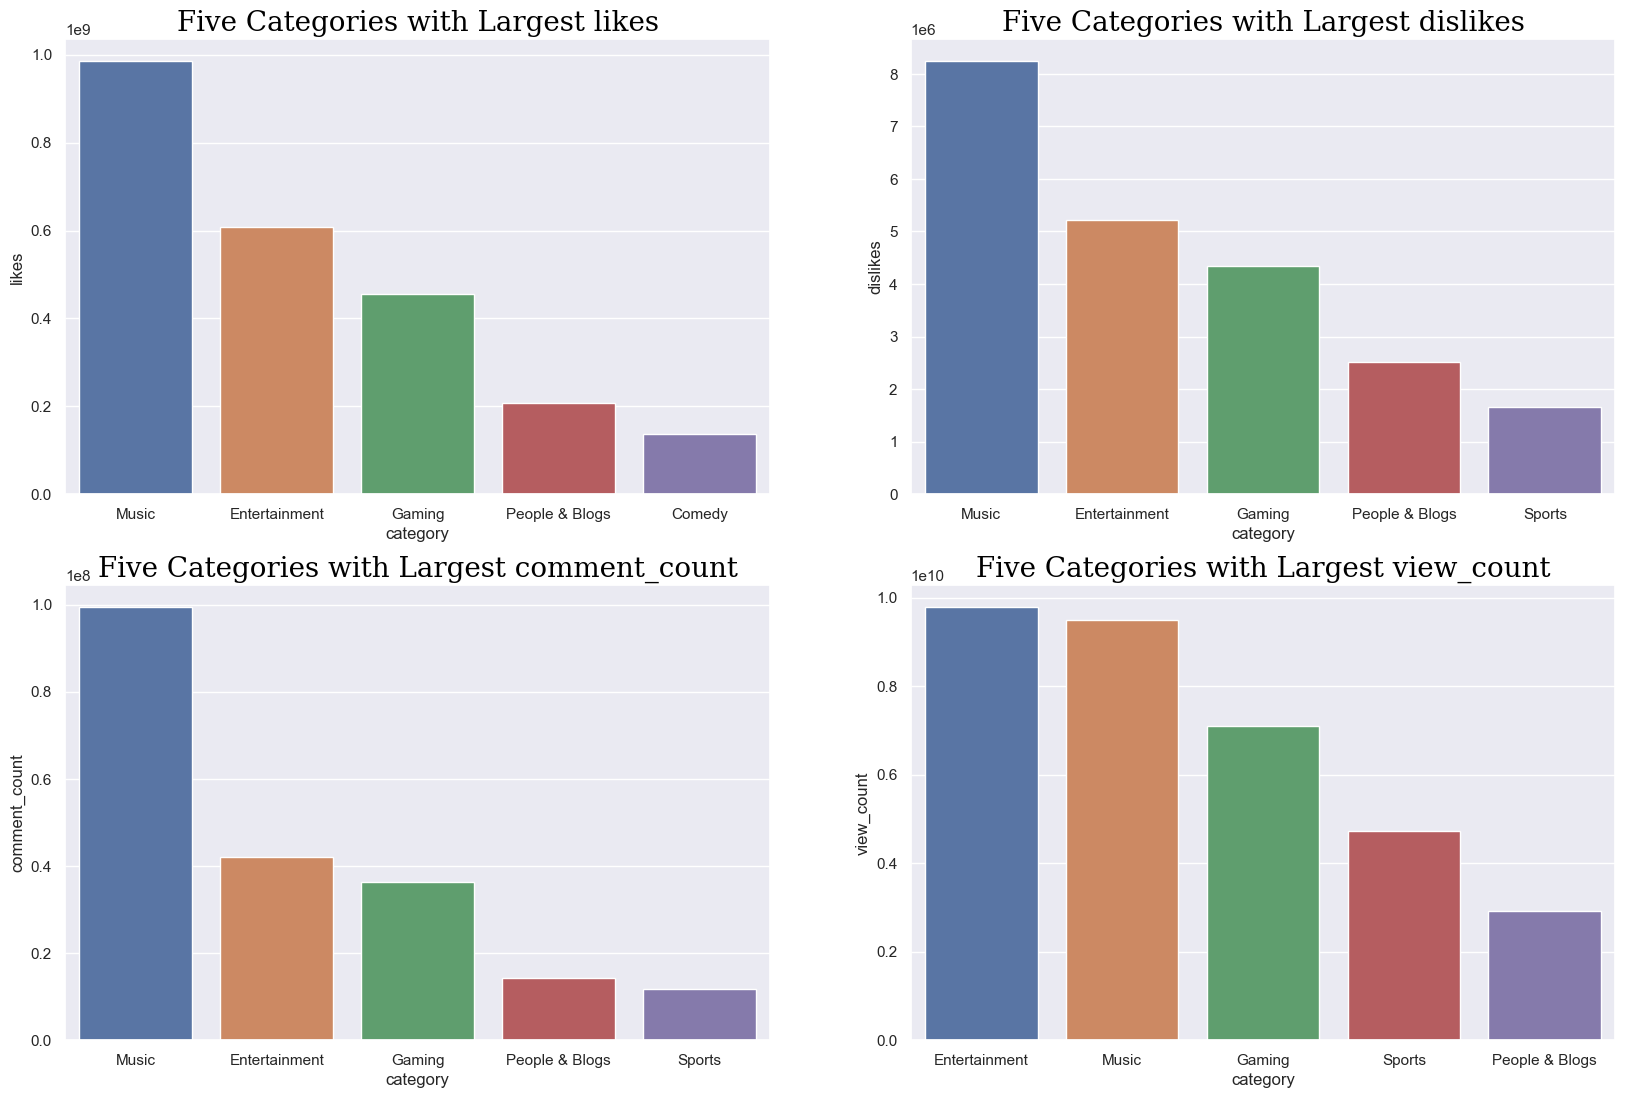

In [151]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','comment_count','view_count',]
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nlargest(5).index
    y = category_group[lst[i]].nlargest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Largest " + lst[i]
    plt.title(title,font)

Based on the diagrams above, the categories that most youtube's users search for on Youtube are music, entertainment, gaming, people, and sports, respectively.

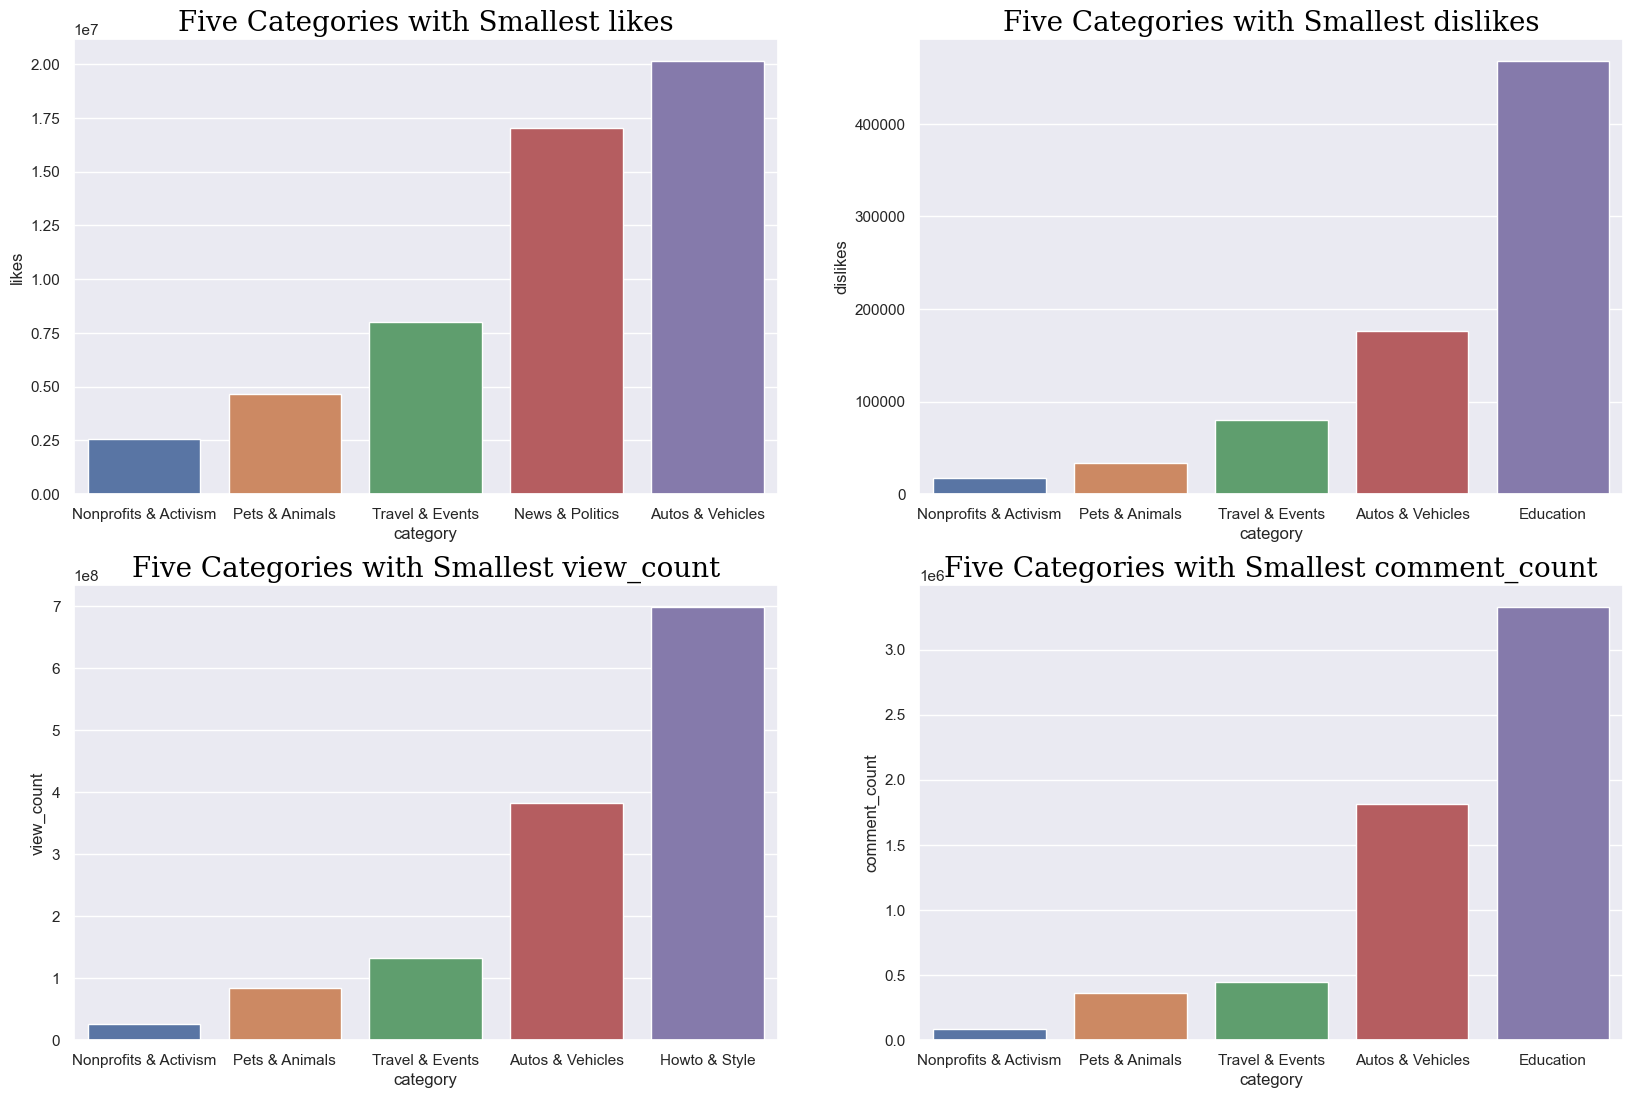

In [152]:
#Plotting the 5 categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','view_count','comment_count']
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nsmallest(5).index
    y = category_group[lst[i]].nsmallest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Smallest " + lst[i]
    plt.title(title,font)


Based on the diagrams above, youtube users are not interested much in the nonprofit, pet & animals, and travels category.

In [153]:
trending_youtube.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis prank basketball skits ghost funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends Apex Legends characters new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming


In [154]:
trending_youtube.categoryId	

0        22
1        20
2        24
3        10
4        26
         ..
33456    15
33457    20
33458    25
33459    10
33460    22
Name: categoryId, Length: 33461, dtype: int64

In [155]:
def count_words(main_data):
    
    word_counter = 0
    
    for texts in main_data["title"]:
        for words in texts:  
            word_counter = word_counter + 1
        
    return word_counter

In [156]:
# !pip install demoji
# !pip install contractions

In [157]:
import demoji
import re
import contractions

def remove_emojis(text):
    return demoji.replace(text, "")


def expand_contractions(text):
    expanded_sentence = contractions.fix(text)
    return expanded_sentence


def clean_text(text):
    # Remove emojis
    text = remove_emojis(text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Handle contractions (replace contractions with full words, i.e. you're >> you are)
    text = expand_contractions(text.lower())
    
    # Find and remove repeated words
    cleaned_text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    
    return text

In [158]:
count_words(trending_youtube) , trending_youtube['title'].head(5)

(1690932,
 0                   I ASKED HER TO BE MY GIRLFRIEND...
 1    Apex Legends | Stories from the Outlands – “Th...
 2    I left youtube for a month and THIS is what ha...
 3    XXL 2020 Freshman Class Revealed - Official An...
 4    Ultimate DIY Home Movie Theater for The LaBran...
 Name: title, dtype: object)

In [159]:
trending_youtube['title'] = trending_youtube['title'].apply(lambda x:clean_text(x))
count_words(trending_youtube) , trending_youtube['title'].head(5)

(1569469,
 0                      i asked her to be my girlfriend
 1    apex legends  stories from the outlands  the e...
 2    i left youtube for a month and this is what ha...
 3    xxl  freshman class revealed  official announc...
 4    ultimate diy home movie theater for the labran...
 Name: title, dtype: object)

In [160]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ") ])
temp = pd.DataFrame(top.most_common(100))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,,34220
1,the,7809
2,official,3969
3,in,3636
4,i,3627
5,video,3429
6,to,3382
7,a,3381
8,of,2544
9,vs,1938


In [161]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Stop words 

In [162]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [163]:
trending_youtube['title'] = trending_youtube['title'].apply(lambda x:remove_stopwords(x))
count_words(trending_youtube) , trending_youtube['title'].head(5)


(1315880,
 0                                     asked girlfriend
 1            apex legends stories outlands endorsement
 2                          left youtube month happened
 3    xxl freshman class revealed official announcement
 4       ultimate diy home movie theater labrant family
 Name: title, dtype: object)

In [164]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ") ])
temp = pd.DataFrame(top.most_common(100))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,official,3969
1,video,3429
2,vs,1938
3,highlights,1648
4,minecraft,1613
5,trailer,1395
6,music,1274
7,new,1185
8,game,1115
9,shorts,941


## Stemming and lemmatizaiton

In [165]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
# nltk.download('punkt')
# nltk.download('omw-1.4')
# from nltk.stem import WordNetLemmatizer

In [166]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def lexicon_normalization(text):
                          
    # 1- Stemming
    words_stem = porter_stemmer.stem(text)
    
    #  Lemmatization
    words_lem = wordnet_lemmatizer.lemmatize(words_stem)
    return words_lem

trending_youtube['title']= trending_youtube['title'].apply(lambda x: lexicon_normalization(x))
print(count_words(trending_youtube))


1285473


In [167]:
# trending_youtube['title']= trending_youtube['title'].apply(lambda x: clean_repeated_words(x))
# count_words(trending_youtube) , trending_youtube['title'].head(5)

In [168]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ") ])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,official,3945
1,video,3444
2,vs,1928
3,minecraft,1613
4,highlights,1299
5,new,1292
6,music,1262
7,game,982
8,short,818
9,ft,816


## Tokenization

In [169]:
def tokenization(text):
    words = nltk.word_tokenize(text) 
#     words = ' '.join(words)
    return ' '.join(words)


In [170]:
trending_youtube['title']= trending_youtube['title'].apply(lambda x: tokenization(x))
count_words(trending_youtube) , trending_youtube['title'].head(5)

(1285586,
 0                                  asked girlfriend
 1              apex legends stories outlands endors
 2                         left youtube month happen
 3      xxl freshman class revealed official announc
 4    ultimate diy home movie theater labrant famili
 Name: title, dtype: object)

In [171]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ")])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,official,3945
1,video,3444
2,vs,1928
3,minecraft,1613
4,highlights,1299
5,new,1292
6,music,1262
7,game,982
8,short,818
9,ft,816


In [172]:
trending_youtube.category.value_counts()

Gaming                   6677
Entertainment            6606
Music                    5298
Sports                   4091
People & Blogs           2939
Comedy                   1736
Film & Animation         1253
News & Politics          1154
Science & Technology     1007
Howto & Style             929
Education                 805
Autos & Vehicles          627
Travel & Events           179
Pets & Animals            142
Nonprofits & Activism      18
Name: category, dtype: int64

## Feature engineering 

In [173]:
trending_youtube.info()
youtube = trending_youtube.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33461 entries, 0 to 33460
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33461 non-null  object        
 1   title              33461 non-null  object        
 2   publishedAt        33461 non-null  datetime64[ns]
 3   channelId          33461 non-null  object        
 4   channelTitle       33461 non-null  object        
 5   categoryId         33461 non-null  int64         
 6   trending_date      33461 non-null  datetime64[ns]
 7   tags               33461 non-null  object        
 8   view_count         33461 non-null  int64         
 9   likes              33461 non-null  int64         
 10  dislikes           33461 non-null  int64         
 11  comment_count      33461 non-null  int64         
 12  thumbnail_link     33461 non-null  object        
 13  comments_disabled  33461 non-null  bool          
 14  rating

In [174]:
#No of tags
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["No_tags"]=tags
#length of desription
desc_len=[len(x) for x in youtube["description"]]
youtube["desc_len"]=desc_len
#length of title
title_len=[len(x) for x in youtube["title"]]
youtube["len_title"]=title_len

# Create a "days_to_trend" column by calculating the number of days it took for each video to become trending
youtube["days_to_trend"] = (youtube["trending_date"].dt.date - youtube["publishedAt"].dt.date).dt.days
youtube.loc[youtube["days_to_trend"] == 0, "days_to_trend"] = 1
youtube["days_to_trend"].value_counts()
# keeping only videos that trending in the first 24hours from posting 
youtube = youtube[ (youtube["days_to_trend"] == 1) | (youtube["days_to_trend"] == 2)]
youtube["days_to_trend"].value_counts()

#ratio of view/likes  upto 3 decimal
youtube["Ratio_View_likes"]=round(youtube["view_count"]/youtube["likes"],3)
#ratio of view/dislikes  upto 3 decimal
youtube["Ratio_View_dislikes"]=round(youtube["view_count"]/youtube["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
youtube["Ratio_views_comment_count"]=round(youtube["view_count"]/youtube["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
youtube["Ratio_likes_dislikes"]=round(youtube["likes"]/youtube["dislikes"],3)
#removing the infinite values
youtube=youtube.replace([np.inf, -np.inf], np.nan)
youtube = youtube.dropna(how='any',axis=0)

In [175]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 0 to 17727
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   video_id                   16015 non-null  object        
 1   title                      16015 non-null  object        
 2   publishedAt                16015 non-null  datetime64[ns]
 3   channelId                  16015 non-null  object        
 4   channelTitle               16015 non-null  object        
 5   categoryId                 16015 non-null  int64         
 6   trending_date              16015 non-null  datetime64[ns]
 7   tags                       16015 non-null  object        
 8   view_count                 16015 non-null  int64         
 9   likes                      16015 non-null  int64         
 10  dislikes                   16015 non-null  int64         
 11  comment_count              16015 non-null  int64         
 12  thum

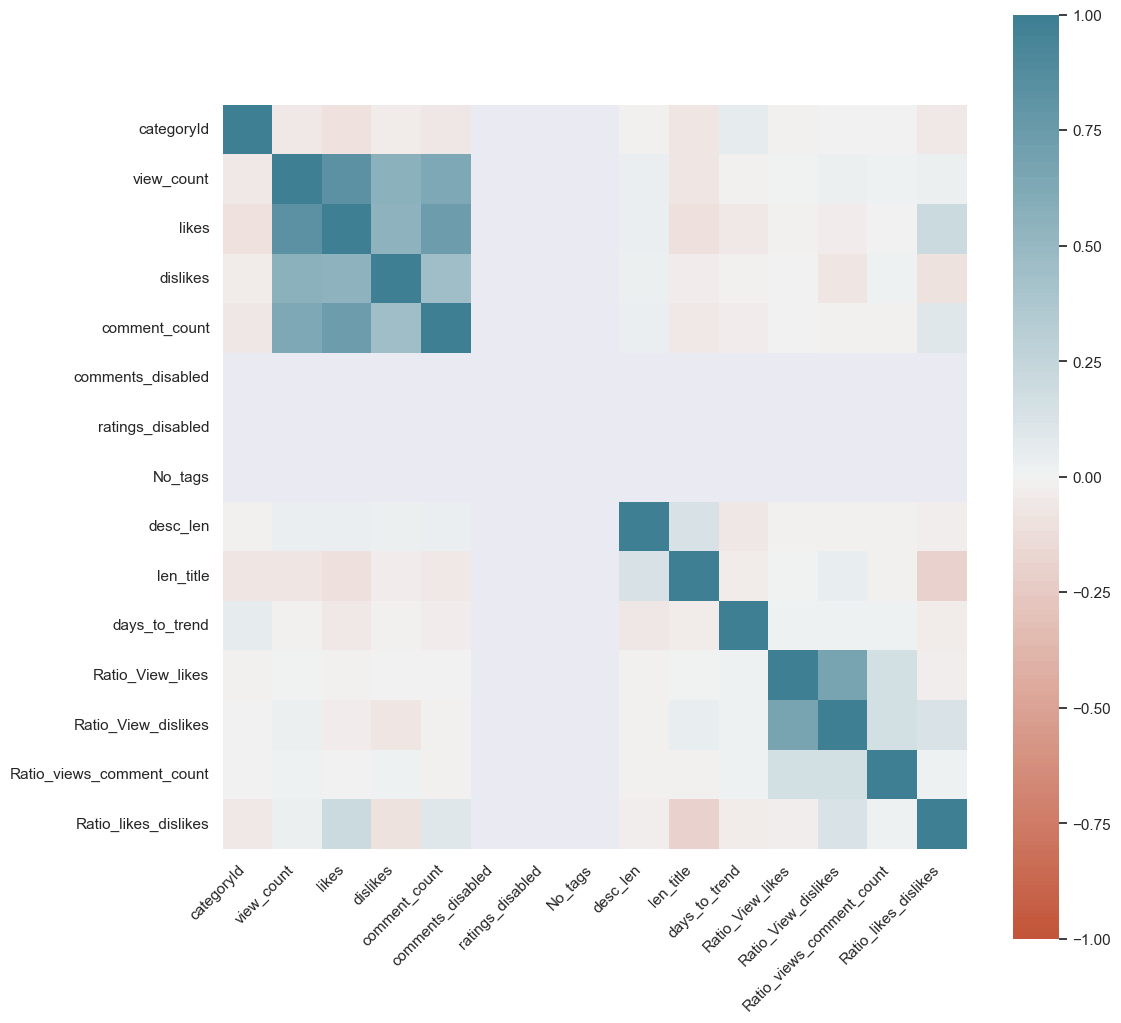

In [176]:
data = youtube

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [177]:
title_col = youtube['title']

youtube.drop(["days_to_trend", 'trending_date',"category" , "title",'tags','description', 'thumbnail_link','channelTitle' , "channelId", "video_id" , "publishedAt"],axis=1,inplace=True)
youtube.info()

y = youtube['view_count']
x = youtube.drop(['view_count'],axis=1,inplace=False) 

x.shape, y.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 0 to 17727
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   categoryId                 16015 non-null  int64  
 1   view_count                 16015 non-null  int64  
 2   likes                      16015 non-null  int64  
 3   dislikes                   16015 non-null  int64  
 4   comment_count              16015 non-null  int64  
 5   comments_disabled          16015 non-null  bool   
 6   ratings_disabled           16015 non-null  bool   
 7   No_tags                    16015 non-null  int64  
 8   desc_len                   16015 non-null  int64  
 9   len_title                  16015 non-null  int64  
 10  Ratio_View_likes           16015 non-null  float64
 11  Ratio_View_dislikes        16015 non-null  float64
 12  Ratio_views_comment_count  16015 non-null  float64
 13  Ratio_likes_dislikes       16015 non-null  flo

((16015, 13), (16015,))

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

train,test,y_train,y_test= train_test_split(x, y, test_size=0.25,shuffle=False)

lr = LinearRegression()
# Decision Tree Regression
tree = DecisionTreeRegressor()
# Random Forest Regression
forest = RandomForestRegressor(n_estimators=100)
# Support Vector Regression
svr = SVR(kernel='rbf')
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
# Multi-layer Perceptron Regression
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
# Gradient Boosting Regression
gbr = GradientBoostingRegressor()
# Neural Network Regression
nnr = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)

models = [lr, tree, forest , svr, knn, mlp, gbr, nnr]
scores = []
for model in models:
    score = cross_val_score(model, x, y , cv=5)
    scores.append(score)
#     break

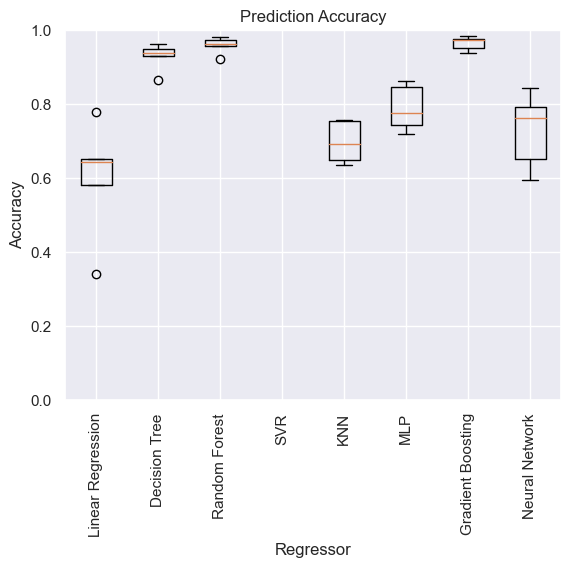

In [187]:
# Plot the results
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'MLP', 'Gradient Boosting', 'Neural Network']
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylim([0,1])
ax.set_title('Prediction Accuracy')
ax.set_xlabel('Regressor')
ax.set_ylabel('Accuracy')
plt.show()

In [190]:
scores 

[array([0.34211533, 0.58294249, 0.77846718, 0.64379108, 0.65160491]),
 array([0.8671081 , 0.95045962, 0.96241095, 0.93984755, 0.92944625]),
 array([0.98221768, 0.96386804, 0.97424644, 0.92136402, 0.95741664]),
 array([-0.06345112, -0.0976893 , -0.07711567, -0.06644632, -0.05959777]),
 array([0.75742378, 0.63602307, 0.75508156, 0.69192692, 0.64863955]),
 array([0.74403487, 0.71928765, 0.86340824, 0.84817917, 0.77774863]),
 array([0.98496814, 0.97458401, 0.97560077, 0.93956638, 0.95249638]),
 array([0.65254972, 0.59434343, 0.84473137, 0.79153725, 0.76237568])]

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train,test,y_train,y_test= train_test_split(x, y, test_size=0.25,shuffle=False)

# Scale the features using StandardScaler
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))
# X_test_scaled = scaler.transform(np.array(train).reshape(-1, 1))

# # REGRESSION ANALYSIS

# # LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
# print(SK)


Root means score 1458682.392393532
Variance score: 0.69
Result : 0.6874503329576757


In [436]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# # Split the data into training and testing sets
# train, test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# # Scale the features using StandardScaler
# scaler = StandardScaler()

# train = scaler.fit_transform(train.values.reshape(-1, 1))
# test = scaler.transform(test.values.reshape(-1, 1))

# Decision Tree Regression
tree = DecisionTreeRegressor()
tree.fit(train, y_train)

# Predicting the test set results
y_pred = tree.predict(test)

# Model evaluation
print('---Decision Tree Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % tree.score(test, y_test))

# Random Forest Regression
forest = RandomForestRegressor(n_estimators=100)
forest.fit(train, y_train)

# Predicting the test set results
y_pred = forest.predict(test)

# Model evaluation
print('---Random Forest Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % forest.score(test, y_test))


# Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(train, y_train)

# Predicting the test set results
y_pred = svr.predict(test)

# Model evaluation
print('---Support Vector Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % svr.score(test, y_test))



---Decision Tree Regression---
Root mean squared error: 1154850.273396163
Variance score: 0.80
Model score: 0.80
---Random Forest Regression---
Root mean squared error: 747032.6841258516
Variance score: 0.92
Model score: 0.92
---Support Vector Regression---
Root mean squared error: 2669191.1471085455
Variance score: -0.05
Model score: -0.05


In [437]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Linear Regression
linear = LinearRegression()
linear.fit(train, y_train)
y_pred = linear.predict(test)
print('---Linear Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % linear.score(test, y_test))

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train, y_train)
y_pred = knn.predict(test)
print('---K-Nearest Neighbors Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % knn.score(test, y_test))

# Multi-layer Perceptron Regression
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(train, y_train)
y_pred = mlp.predict(test)
print('---Multi-layer Perceptron Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % mlp.score(test, y_test))


---Linear Regression---
Root mean squared error: 1458682.392393532
Variance score: 0.69
Model score: 0.69
---K-Nearest Neighbors Regression---
Root mean squared error: 1477337.2958229445
Variance score: 0.68
Model score: 0.68
---Multi-layer Perceptron Regression---
Root mean squared error: 1057536.7872040805
Variance score: 0.84
Model score: 0.84


In [440]:
# !pip install xgboost

^C


In [442]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
# import xgboost as xgb

# Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(train, y_train)

# Predicting the test set results
y_pred = gbr.predict(test)

# Model evaluation
print('---Gradient Boosting Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % gbr.score(test, y_test))

# Neural Network Regression
nnr = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
nnr.fit(train, y_train)

# Predicting the test set results
y_pred = nnr.predict(test)

# Model evaluation
print('---Neural Network Regression---')
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Model score: %.2f' % nnr.score(test, y_test))

# # XGBoost Regression
# xgb = xgb.XGBRegressor()
# xgb.fit(train, y_train)

# # Predicting the test set results
# y_pred = xgb.predict(test)

# # Model evaluation
# print('---XGBoost Regression---')
# print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))
# print('Model score: %.2f' % xgb.score(test, y_test))


---Gradient Boosting Regression---
Root mean squared error: 698248.5560225385
Variance score: 0.93
Model score: 0.93
---Neural Network Regression---
Root mean squared error: 1201310.3903513842
Variance score: 0.79
Model score: 0.79


Standardization is commonly used for models that rely on distance measures or gradient descent, such as linear regression, logistic regression, support vector machines, and neural networks. It is also useful for clustering and dimensionality reduction techniques such as k-means clustering and principal component analysis (PCA).

On the other hand, some models such as decision trees, random forests, and ensemble methods do not require standardization as they are not sensitive to the scale of the features. In fact, standardization may even harm the performance of these models.

In [177]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models and evaluate on test set
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Plot results
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lr_acc, dt_acc, rf_acc]
plt.bar(models, accuracies)
plt.ylim([0,1])
plt.title('Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()



KeyboardInterrupt



KeyboardInterrupt: 

In [119]:
x.shape, y.shape

((16015, 13), (16015,))

In [191]:
x.shape, y.shape

((16015, 13), (16015,))